<a href="https://colab.research.google.com/github/danhively/CS4499/blob/main/HW6_Hively.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6
Dr. Kerby <br>
Data Science and Applied Machine Learning <br>
Due March 15th, 2023 at 3 PM <br>
Worth 100 pts <br>
Student's name: Dan Hively

For a description of the HousePrices.csv dataset, visit:</br>
https://gitlab.com/CEADS/DrKerby/python/blob/master/HousePrices_description.txt

In [29]:
# Just execute this cell
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fulldf = pd.read_csv('https://raw.githubusercontent.com/LGKerby/Python/master/HousePrices.csv')
fulldf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Question 1** (10 points)<br/>
Explore the dataset using at least three different methods 

In [30]:
# Print some basic information about the dataset.

# Print the list of columns in the CSV file.
print('----------------------------')
print('Columns')
print('----------------------------')
print(fulldf.columns)

# Print the first five rows of the DataFrame
print('----------------------------')
print('First 5 rows')
print('----------------------------')
print(fulldf.head())

# Print the shape of the DataFrame
print('----------------------------')
print('Shape')
print('----------------------------')
print(fulldf.shape)

# Print some summary statistics of the DataFrame
print('----------------------------')
print('statistics')
print('----------------------------')
print(fulldf.describe())

----------------------------
Columns
----------------------------
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageC

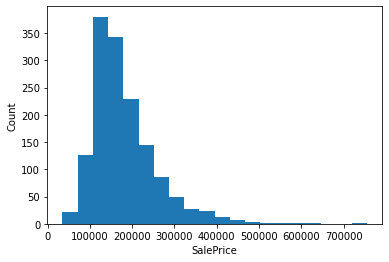

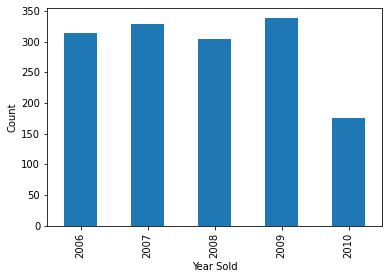

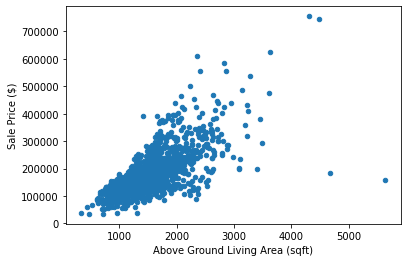

In [31]:
# Create a histogram of the 'SalePrice' 
plt.hist(fulldf['SalePrice'], bins=20)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

# Create a bar plot of the YrSold 
fulldf['YrSold'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.show()

# Create a scatter plot of the dataset
fulldf.plot(kind='scatter', x='GrLivArea', y='SalePrice')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.show()

There are 81 columns in our dataset. One column is the ID (which is not valuable data but an after-label), and another column is the Sale Price, which is what we will try to predict with machine learning. Therefore, we have 79 possible factors to use to create our model. Of these, we will keep the following 16:<br/>
*MSZoning, LotArea, Neighborhood, BldgType, OverallQual, OverallCond, YearBuilt, TotalBsmtSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, GarageCars, SaleCondition*

**Question 2** (10 points)<br/>
Create a DataFrame `housedf` which keeps only these 16 columns from `fulldf`. Print `housedf.head()` and `housedf.shape` to show you did it right.

In [32]:
# Select the desired columns and create a new DataFrame.
housedf = fulldf[['MSZoning', 'LotArea', 'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'GarageCars', 'SaleCondition']]



In [33]:

# Print the first five rows of the new DataFrame.
print(housedf.head())

# Print the shape of the new DataFrame.
print(housedf.shape)

print('----------------------------')
print('Columns')
print('----------------------------')
print(len(housedf.columns))
print(housedf.columns)

  MSZoning  LotArea Neighborhood BldgType  OverallQual  OverallCond  \
0       RL     8450      CollgCr     1Fam            7            5   
1       RL     9600      Veenker     1Fam            6            8   
2       RL    11250      CollgCr     1Fam            7            5   
3       RL     9550      Crawfor     1Fam            7            5   
4       RL    14260      NoRidge     1Fam            8            5   

   YearBuilt  TotalBsmtSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       2003          856       1710             1             0         2   
1       1976         1262       1262             0             1         2   
2       2001          920       1786             1             0         2   
3       1915          756       1717             1             0         1   
4       2000         1145       2198             1             0         2   

   HalfBath  BedroomAbvGr  GarageCars SaleCondition  
0         1             3           2        Norma

**Question 3** (10 points) <br/>
Place the `SalePrice` column (from `fulldf`) into a variable called `target`. Show `target.head()`.

In [34]:
# Place the SalePrice column (from fulldf) into a variable called target. 
target = fulldf['SalePrice']

# Print the first five rows of the target variable
print(target.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


**Question 4** (10 points) <br/>
12 of our factors in `housedf` are numeric. 4 are categorical. The 4 categorical factors (MSZoning, Neighborhood, BldgType, and SaleCondition) need to be converted using `pandas` `get_dummies`. Do this and assign the result into a new DataFrame called `df`. Print `df.head()` to make sure you completed it correctly. `df` should now have 53 columns. In a separate cell, print `df.columns` so you can see how `get_dummies` handled the categorical factors, and what our 53 factors now are.

*Note:* OverallQual and OverallCond are ordinal. They are rankings from 1 to 10 on the overall quality and condition of the home, respectively. As a ranking of 10 (very excellent) should contribute more to the value of a home than a ranking of 1 (very poor), it is an acceptable approximation to keep these as numeric factors rather than use `get_dummies` and add another 18 factors to our model. However, this means the relationship within OverallQual and OverallCond will be forced to be linear among the rankings and may not represent its real impact on value. You are welcome to also analyze converting these factors using `get_dummies` if you are curious about it, but you do not have to.

In [35]:
# Convert the categorical features to dummy variables
df = pd.get_dummies(housedf, columns=['MSZoning', 'Neighborhood', 'BldgType', 'SaleCondition'])

# Print the first five rows of the new DataFrame
print(df.head())

   LotArea  OverallQual  OverallCond  YearBuilt  TotalBsmtSF  GrLivArea  \
0     8450            7            5       2003          856       1710   
1     9600            6            8       1976         1262       1262   
2    11250            7            5       2001          920       1786   
3     9550            7            5       1915          756       1717   
4    14260            8            5       2000         1145       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  ...  BldgType_2fmCon  \
0             1             0         2         1  ...                0   
1             0             1         2         0  ...                0   
2             1             0         2         1  ...                0   
3             1             0         1         0  ...                0   
4             1             0         2         1  ...                0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  SaleCondition_Abnorml  \
0                0  

In [36]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'GarageCars', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs

**Question 5** (10 points) <br/>
Now split your `df` and `target` dataset into a training and testing set, using `train_test_split`. Call the results `Xtrain`, `Xtest`, `ytrain`, and `ytest`. Print `head()` and `shape` for each to ensure the data was split correctly.

In [37]:
# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(df, target, test_size=0.7, random_state=35)

In [38]:
# Print the first five rows and shape of the training set
print('Xtrain:')
print(Xtrain.head())
print(Xtrain.shape)

Xtrain:
      LotArea  OverallQual  OverallCond  YearBuilt  TotalBsmtSF  GrLivArea  \
1225    10482            6            8       1958          588       1138   
155      9600            6            5       1924          572       1096   
170     12358            5            6       1941          720       1382   
936     10083            7            5       2003         1176       1200   
777     13350            5            5       1974          864        894   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  ...  BldgType_2fmCon  \
1225             0             1         1         0  ...                0   
155              0             0         1         0  ...                0   
170              0             0         1         1  ...                0   
936              1             0         2         0  ...                0   
777              1             0         1         0  ...                0   

      BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE

In [39]:
# Print the first five rows and shape of the training set
print('ytrain:')
print(ytrain.head())
print(ytrain.shape)

ytrain:
1225    145000
155      79000
170     128500
936     184900
777     142500
Name: SalePrice, dtype: int64
(438,)


In [40]:
# Print the first five rows and shape of the testing set
print('Xtest:')
print(Xtest.head())
print(Xtest.shape)

Xtest:
      LotArea  OverallQual  OverallCond  YearBuilt  TotalBsmtSF  GrLivArea  \
594      7990            5            6       1975          924        924   
486     10289            5            7       1965         1073       1073   
645     10530            6            5       1971          981        981   
40       8658            6            5       1965         1088       1324   
1140     7350            5            7       1951          952        952   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  ...  BldgType_2fmCon  \
594              0             0         1         0  ...                0   
486              1             0         1         1  ...                0   
645              1             0         1         1  ...                0   
40               0             0         2         0  ...                0   
1140             1             0         1         0  ...                0   

      BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE 

In [41]:
# Print the first five rows and shape of the testing set
print('ytest:')
print(ytest.head())
print(ytest.shape)

ytest:
594     110000
486     156000
645     143250
40      160000
1140    139000
Name: SalePrice, dtype: int64
(1022,)


**Question 6** (25 points) <br/>
**a)** Now create your linear regression model, using `LinearRegression().fit` on your training data. Assign it to `regmodel`. <br/>
**b)** Calculate the predictions the model gives for your test dataset, assigning it to the variable `predictions`. <br/>
**c)** Print the $RMSE$ and $R^2$ values (for both the training and testing data). <br/>
**d)** Copy your `train_test_split` command from Question 5 to the top of the next cell, so that you can run that cell and do one complete random sampling of the train/test data, linear model generation, model statistics, and model equation.  

In [42]:
# Imports
from sklearn.metrics import r2_score

# Split the data into training and testing sets - copied from Question 5.
Xtrain, Xtest, ytrain, ytest = train_test_split(df, target, test_size=0.7, random_state=32)

# Create a linear regression model and fit it to the training data
regmodel = LinearRegression().fit(Xtrain, ytrain)

# Calculate the predictions for the training and test data
train_predictions = regmodel.predict(Xtrain)
test_predictions = regmodel.predict(Xtest)

# Calculate the RMSE and R2 values for the training data
train_rmse = np.sqrt(mean_squared_error(ytrain, train_predictions))
train_r2 = r2_score(ytrain, train_predictions)

# Calculate the RMSE and R2 values for the test data
test_rmse = np.sqrt(mean_squared_error(ytest, test_predictions))
test_r2 = r2_score(ytest, test_predictions)

# Print the results
print('Training set RMSE:', train_rmse)
print('Training set R2:', train_r2)
print('Testing set RMSE:', test_rmse)
print('Testing set R2:', test_r2)

Training set RMSE: 24259.315111019718
Training set R2: 0.9010564602115188
Testing set RMSE: 37848.86003184104
Testing set R2: 0.778263658354015


**Question 7** (25 points) <br/>
Run the `train_test_split` and `LinearRegression().fit` several times, noting the RMSE and R^2 train and test results, along with the regression equation found by the model. Answer the following questions.

What appears to be the rough average for RMSE? <br/>
What appears to be the rough averages for R^2? <br/>

Name three things that make sense in your model.<br/>
Name two things that don't make sense in your model.<br/>

Based on your model, which neighborhoods gave the most premium to home prices? Do these correspond to the wealthiest neighborhoods? <br/>
What neighborhoods incurred the greatest penalties in home prices? Do these correspond to the poorest neighborhoods? 

Are you concerned you overfit your model? 

Put your answers here.

Rough average for RMSE is 24259.31.<br/>
Rough averages for R^2 is 0.901.

Three things that make sense in my model.
1. Living area (GrLivArea) having a positive effect on sale price.
2. The number of cars that can fit in the garage (GarageCars) having a positive effect on sale price.
3. Overall quality rating (OverallQual) having a positive effect on sale price.

Two things that don't make sense in my model.
1. Variables such as LowQualFinSF having high coefficients despite looking less important or irrelevant.
2. Variables such as YearBuilt having negligible or negative effects on sale price despite seeming important.

*One final note:* If we had more than just ~1500 homes, we could create machine learning models using all of the factors available in `fulldf`. 

**Graduate Students Only:** \\
Try adding and/or subtracting features, or creating your own, and building a new linear regression model with those features. Also try different variations of linear regression (ie Lasso or Ridge etc), or try One Hot Encoding instead of get_dummies. Discuss advantages and disadvantages and try to explain what you found. Did you get a better model?